1. 로지스틱 회귀

알고싶은 함수 ; (wx+b)



시그모이드 함수 ;
1/(1+e^-x)


베르누이 이항분포 ;
P


Odds ratio ;
P/1-P


로짓 변환 ;
logit



2. 차원축소

## Logistic Regression
- Parameter C 를 조정해 과대적합 혹은 과소적합 문제를 해결
- C(cost function) 값이 크면(높은 코스트) --> 훈련을 더 복잡하게 -->약한 규제
- C값이 작으면(낮은 코스트) --> 훈련을 덜 복잡하게 --> 강한 규제  
l1 l2 규제

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [3]:
iris_dataset = datasets.load_iris()

In [4]:
#데이터 분할 - 이항분류
X = iris_dataset.data[50:,:]
y = iris_dataset.target[50:]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 58)

In [5]:
X_train.shape

(70, 4)

In [6]:
logreg = LogisticRegression().fit(X_train,y_train)

In [13]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
print('훈련 세트 점수 : {:.3f}'.format(logreg.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg.score(X_test,y_test)))

훈련 세트 점수 : 0.957
테스트 세트 점수 : 0.933


In [15]:
logreg001 = LogisticRegression(solver = 'lbfgs',C=0.01).fit(X_train,y_train)
logreg100 = LogisticRegression(solver = 'lbfgs',C=100).fit(X_train,y_train)

In [16]:
logreg001

LogisticRegression(C=0.01)

In [17]:
logreg100

LogisticRegression(C=100)

In [18]:
#5.1 C = 0.01 결과 비교 -> 낮은 코스트 -> 훈련 덜 복잡 -> 강한 규제 -> 과소적합
#5.2 C = 100 결과 비교 -> 높은 코스트 -> 훈련더 복잡 -> 약한규제 -> 과대적합

In [19]:
print('훈련 세트 점수 : {:.3f}'.format(logreg001.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg001.score(X_test,y_test)))
print('훈련 세트 점수 : {:.3f}'.format(logreg100.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg100.score(X_test,y_test)))

훈련 세트 점수 : 0.914
테스트 세트 점수 : 0.900
훈련 세트 점수 : 0.986
테스트 세트 점수 : 0.900


In [20]:
logreg.coef_

array([[-0.10421167, -0.26898011,  2.61548484,  2.18239913]])

In [21]:
logreg.coef_[0][0]*X_test[:,0]

array([-0.52105834, -0.69821817, -0.687797  , -0.57316417, -0.7190605 ,
       -0.5940065 , -0.62527   , -0.69821817, -0.6565335 , -0.67737584,
       -0.61484884, -0.60442767, -0.82327217, -0.6565335 , -0.51063717,
       -0.57316417, -0.64611234, -0.67737584, -0.60442767, -0.6565335 ,
       -0.58358534, -0.750324  , -0.70863934, -0.69821817, -0.6565335 ,
       -0.66695467, -0.6565335 , -0.58358534, -0.51063717, -0.76074517])

In [24]:
X_test[:,np.newaxis,3]

array([[1. ],
       [1.8],
       [1.3],
       [1. ],
       [2.3],
       [1.2],
       [1.5],
       [2.3],
       [2.5],
       [1.5],
       [1.8],
       [1.2],
       [2. ],
       [1.8],
       [1.7],
       [1.1],
       [1.8],
       [2. ],
       [1. ],
       [2.4],
       [1.5],
       [1.8],
       [1.4],
       [1.4],
       [1.5],
       [2.3],
       [1.5],
       [1.1],
       [1. ],
       [1.8]])

In [23]:
X_test

array([[5. , 2.3, 3.3, 1. ],
       [6.7, 2.5, 5.8, 1.8],
       [6.6, 2.9, 4.6, 1.3],
       [5.5, 2.4, 3.7, 1. ],
       [6.9, 3.2, 5.7, 2.3],
       [5.7, 3. , 4.2, 1.2],
       [6. , 2.2, 5. , 1.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 3.3, 6. , 2.5],
       [6.5, 2.8, 4.6, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [5.8, 2.6, 4. , 1.2],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 2.9, 5.6, 1.8],
       [4.9, 2.5, 4.5, 1.7],
       [5.5, 2.4, 3.8, 1.1],
       [6.2, 2.8, 4.8, 1.8],
       [6.5, 3.2, 5.1, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [6.3, 3.4, 5.6, 2.4],
       [5.6, 3. , 4.5, 1.5],
       [7.2, 3.2, 6. , 1.8],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3.1, 4.4, 1.4],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.2, 5.3, 2.3],
       [6.3, 2.5, 4.9, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [4.9, 2.4, 3.3, 1. ],
       [7.3, 2.9, 6.3, 1.8]])

In [25]:
logreg.coef_[0][0]*X_test[:,np.newaxis,0]+logreg.coef_[0][1]*X_test[:,np.newaxis,1]+\
logreg.coef_[0][2]*X_test[:,np.newaxis,2]+logreg.coef_[0][3]*X_test[:,np.newaxis,3]+logreg.intercept_

array([[-5.4217152 ],
       [ 2.63196034],
       [-1.6949919 ],
       [-4.45452511],
       [ 3.25248302],
       [-2.89253326],
       [ 0.03849493],
       [ 2.01937895],
       [ 4.50923729],
       [-1.2211929 ],
       [-0.08844124],
       [-3.31845936],
       [ 4.16300294],
       [ 2.042956  ],
       [-0.79882886],
       [-3.97473672],
       [-0.01211269],
       [ 1.07015704],
       [-3.52028871],
       [ 3.21790543],
       [-1.44274691],
       [ 2.9146654 ],
       [-0.94759935],
       [-2.06406615],
       [ 0.10739185],
       [ 2.25839492],
       [-0.33501108],
       [-3.75050741],
       [-5.43819205],
       [ 3.76958372]])

In [26]:
odds = np.exp(logreg.coef_[0][0]*X_test[:,np.newaxis,0]+logreg.coef_[0][1]*X_test[:,np.newaxis,1]+\
logreg.coef_[0][2]*X_test[:,np.newaxis,2]+logreg.coef_[0][3]*X_test[:,np.newaxis,3]+logreg.intercept_)

In [27]:
final_values = odds/(1+odds)

In [28]:
final_values

array([[0.00440011],
       [0.93289038],
       [0.15512048],
       [0.01149223],
       [0.96276223],
       [0.05252391],
       [0.50962254],
       [0.88281678],
       [0.98911298],
       [0.22772659],
       [0.47790409],
       [0.03494333],
       [0.98467767],
       [0.88523392],
       [0.31027609],
       [0.0184379 ],
       [0.49697186],
       [0.74462678],
       [0.02874044],
       [0.96150256],
       [0.19112033],
       [0.94856666],
       [0.27936787],
       [0.11263877],
       [0.52682219],
       [0.90537221],
       [0.41702185],
       [0.02296598],
       [0.00432852],
       [0.97745819]])

In [30]:
temp = logreg.predict_proba(X_test)

In [31]:
temp

array([[0.99559989, 0.00440011],
       [0.06710962, 0.93289038],
       [0.84487952, 0.15512048],
       [0.98850777, 0.01149223],
       [0.03723777, 0.96276223],
       [0.94747609, 0.05252391],
       [0.49037746, 0.50962254],
       [0.11718322, 0.88281678],
       [0.01088702, 0.98911298],
       [0.77227341, 0.22772659],
       [0.52209591, 0.47790409],
       [0.96505667, 0.03494333],
       [0.01532233, 0.98467767],
       [0.11476608, 0.88523392],
       [0.68972391, 0.31027609],
       [0.9815621 , 0.0184379 ],
       [0.50302814, 0.49697186],
       [0.25537322, 0.74462678],
       [0.97125956, 0.02874044],
       [0.03849744, 0.96150256],
       [0.80887967, 0.19112033],
       [0.05143334, 0.94856666],
       [0.72063213, 0.27936787],
       [0.88736123, 0.11263877],
       [0.47317781, 0.52682219],
       [0.09462779, 0.90537221],
       [0.58297815, 0.41702185],
       [0.97703402, 0.02296598],
       [0.99567148, 0.00432852],
       [0.02254181, 0.97745819]])

In [32]:
np.round(temp[:,np.newaxis,1],3)==np.round(final_values,3)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

---

### "StatQuest: Principal Component Analysis, Josh Starmer" [바로 보기](https://www.youtube.com/watch?v=FgakZw6K1QQ)

## 주성분 분석(Principal Component Analysis)
1. 주성분 분석은 차원 축소를 위해 사용됨
--> 고차원의 데이터를 저차원의 데이터로 feature extraction 가능

- 목적
    - 차원(dimension)을 감소 시켜 시각화에 도움
    - 변수의 수를 줄임
- 기대효과
    - 통계 : 적은 수의 특성으로 특정 현상을 설명
    - 머신러닝 : 모델 성능 강화
    
2. 개념
    - 여러개의 양적 변수들 사이의 공분산(상관계수)를 이용하여,
    - 변수들의 선형결합으로 표시되는 주성분을 찾음(축의 개념)
    - 2~3개의 주성분으로 전체 분산(variance)의 대부분을 설명하고자 하는 다변량 분석법
    - 원데이터의 소실없이 데이터를 잘 설명할 수 있는 변수들의 선형 조합을 찾는 것이 목표


In [33]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

[eigenvector / eigenvalue]
- 특징
    - n by n 정방행렬은 n개의 eigenvector를 가짐(n개의 eigenvalue)
- 제약 : pca에서 eigenvector의 loading 계수 제곱합은 1

[linear Transform]

In [35]:
matrix_a = np.array([[2,3],[2,1]])

In [36]:
vec = np.array([[1],[3]])

In [37]:
np.dot(matrix_a, vec)

array([[11],
       [ 5]])

[eigenvector / eigenvalue]

In [39]:
eigen_a = np.array([[3],[2]])

In [40]:
np.dot(matrix_a,eigen_a)

array([[12],
       [ 8]])

[how to calculate eigenvector?]

In [41]:
a = np.array([[3,0,1],[-4,1,2],[-6,0,-2]])

In [42]:
a

array([[ 3,  0,  1],
       [-4,  1,  2],
       [-6,  0, -2]])

In [43]:
np.linalg.eig(a)

(array([ 1.00000000e+00,  1.00000000e+00, -2.22044605e-16]),
 array([[ 0.00000000e+00,  5.55111512e-17, -9.53462589e-02],
        [ 1.00000000e+00, -1.00000000e+00, -9.53462589e-01],
        [ 0.00000000e+00, -1.11022302e-16,  2.86038777e-01]]))

In [44]:
eig_val, eig_vec = np.linalg.eig(a)

In [45]:
eig_vec[:,np.newaxis,0]

array([[0.],
       [1.],
       [0.]])

In [46]:
eig_vec[:,np.newaxis,1]

array([[ 5.55111512e-17],
       [-1.00000000e+00],
       [-1.11022302e-16]])

In [47]:
eig_vec[:,np.newaxis,2]

array([[-0.09534626],
       [-0.95346259],
       [ 0.28603878]])

In [77]:
# 세번째 아이겐벡터의 제곱합
np.sum(eig_vec[:,np.newaxis,2]**2)

0.9999999999999998

[covariance의 이해(feat. correlation)]

- 상관계수행렬은 데이터의 분포를 표현(분포에 관한 정보라고 간주)
- n by n 상관계수행렬은 n개의 eigenvector를 가짐
- 이 eigenvector들과 상관계수 행렬의 선형 변환으로 데이터가 변하지 않음(데이터 소실 없음)
- eigenvector 가 n개의 축이라고 생각할때 데이터를 이 n개의 축에 대하여 변환을 실시하면?
- n번의 변환에서 각각 상관계수 행렬이 가졌던 오리지널 데이터의 분포에 관한 정보를 전부 나눠가지게 될것
- 만약 특정 축 몇개가 분포에 대한 정보(분산의) 대부분을 가져간다면?
- 이 몇개의 축으로(주성분으로, 특성의 수로) 데이터의 대부분을 설명할 수 있을 것  

--> 차원축소(dimension reduction, feature extraction)가 가능해짐

**PCA는 데이터를 표준화(stanardizing)하여 진행한다**

In [49]:
lamen = dict({'name':['쇠고기라면','해물라면','얼큰라면',
                      '떡라면','짬뽕라면','만두라면','치즈라면',
                      '된장라면','볶음라면','김치라면'],
              'noodle':[2,1,5,2,3,4,4,1,3,5],
              'bowl':[4,5,3,2,5,3,4,2,3,5],
              'soup':[5,1,4,3,5,2,3,1,2,3]})

In [50]:
lamen1 = pd.DataFrame(lamen)

In [51]:
lamen1

,name,noodle,bowl,soup
0,쇠고기라면,2,4,5
1,해물라면,1,5,1
2,얼큰라면,5,3,4
3,떡라면,2,2,3
4,짬뽕라면,3,5,5
5,만두라면,4,3,2
6,치즈라면,4,4,3
7,된장라면,1,2,1
8,볶음라면,3,3,2
9,김치라면,5,5,3


**How StandardScaler works?**

In [52]:
noodle_sd = np.std(lamen1['noodle'])
noodle_mean = np.mean(lamen1['noodle'])

In [53]:
a=[]
for i in range(len(lamen1['noodle'])):
    a.append((lamen1['noodle'][i]-noodle_mean)/noodle_sd)

In [54]:
a

[-0.7071067811865475,
 -1.414213562373095,
 1.414213562373095,
 -0.7071067811865475,
 0.0,
 0.7071067811865475,
 0.7071067811865475,
 -1.414213562373095,
 0.0,
 1.414213562373095]

## StadardScaler 적용

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

1. 데이터 분리 

In [56]:
lamenEval = lamen1[['noodle','bowl','soup']]
lamenName = lamen1['name']

2. 스케일러로 값 변환

In [57]:
scaler = StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled = scaler.transform(lamenEval.values)

In [58]:
lamen_scaled

array([[-0.70710678,  0.3592106 ,  1.52752523],
       [-1.41421356,  1.25723711, -1.38204664],
       [ 1.41421356, -0.53881591,  0.80013226],
       [-0.70710678, -1.43684242,  0.0727393 ],
       [ 0.        ,  1.25723711,  1.52752523],
       [ 0.70710678, -0.53881591, -0.65465367],
       [ 0.70710678,  0.3592106 ,  0.0727393 ],
       [-1.41421356, -1.43684242, -1.38204664],
       [ 0.        , -0.53881591, -0.65465367],
       [ 1.41421356,  1.25723711,  0.0727393 ]])

3. PCA 모델링

- PCA.fit() : 주성분을 찾음
- PCA.transform() : 새로운 주성분으로 데이터 변환

In [59]:
pca_lamen = PCA()
pca_lamen.fit(lamen_scaled)

X_pca_lamen = pca_lamen.transform(lamen_scaled)

print('original data: {}'.format(str(lamen_scaled.shape)))

print('deducted data: {}'.format(str(X_pca_lamen.shape)))

original data: (10, 3)
deducted data: (10, 3)


4. 변환된 데이터 확인

In [60]:
X_pca_lamen

array([[-0.75045146,  0.54986707,  1.44804503],
       [ 1.02673873,  1.99341604, -0.68029269],
       [-1.03344902, -1.36473856,  0.00244833],
       [ 1.10826926, -0.71479113,  0.91138358],
       [-1.62344488,  0.83152952,  0.76613567],
       [ 0.29164279, -0.78379531, -0.72076585],
       [-0.63771758, -0.15146621, -0.45243513],
       [ 2.43336106, -0.13384787,  0.1881694 ],
       [ 0.69576209, -0.3563698 , -0.32834386],
       [-1.51071099,  0.13019625, -1.13434448]])

In [61]:
pca_lamen.components_

array([[-0.571511  , -0.52211611, -0.63306393],
       [-0.60447096,  0.78960694, -0.105526  ],
       [-0.5549685 , -0.32235949,  0.76687308]])

[eigenvalue의 이해(feat.cov of transformed data)]

In [62]:
lamen1.corr()

,noodle,bowl,soup
noodle,1.000000,0.19050,0.360041
bowl,0.190500,1.00000,0.300480
soup,0.360041,0.30048,1.000000


In [78]:
eig_val, eig_vec = np.linalg.eig(lamen1.corr())

In [65]:
X_pca_lamen

array([[-0.75045146,  0.54986707,  1.44804503],
       [ 1.02673873,  1.99341604, -0.68029269],
       [-1.03344902, -1.36473856,  0.00244833],
       [ 1.10826926, -0.71479113,  0.91138358],
       [-1.62344488,  0.83152952,  0.76613567],
       [ 0.29164279, -0.78379531, -0.72076585],
       [-0.63771758, -0.15146621, -0.45243513],
       [ 2.43336106, -0.13384787,  0.1881694 ],
       [ 0.69576209, -0.3563698 , -0.32834386],
       [-1.51071099,  0.13019625, -1.13434448]])

In [68]:
np.cov(X_pca_lamen.T,ddof = 0)

array([[ 1.57285386e+00, -3.63655046e-17,  7.93454755e-18],
       [-3.63655046e-17,  8.14008318e-01, -4.22580952e-17],
       [ 7.93454755e-18, -4.22580952e-17,  6.13137822e-01]])

In [69]:
import pandas as pd

In [70]:
pd.DataFrame(X_pca_lamen).cov(ddof=0)

,0,1,2
0,1.572854e+00,-3.636550e-17,-1.426991e-17
1,-3.636550e-17,8.140083e-01,-2.005363e-17
2,-1.426991e-17,-2.005363e-17,6.131378e-01


In [82]:
np.cov(X_pca_lamen.T, ddof = 0)

array([[ 1.57285386e+00, -3.63655046e-17,  7.93454755e-18],
       [-3.63655046e-17,  8.14008318e-01, -4.22580952e-17],
       [ 7.93454755e-18, -4.22580952e-17,  6.13137822e-01]])

In [71]:
eig_vec

array([[-0.571511  , -0.60447096, -0.5549685 ],
       [-0.52211611,  0.78960694, -0.32235949],
       [-0.63306393, -0.105526  ,  0.76687308]])

In [83]:
np.corrcoef(X_pca_lamen)

array([[ 1.        , -0.54543647,  0.65000347, -0.20235648,  0.90400156,
        -0.891286  ,  0.47266235, -0.8608972 , -0.90400156,  0.32018838],
       [-0.54543647,  1.        , -0.99147361, -0.71043981, -0.13474095,
         0.10608686,  0.48080895,  0.04313057,  0.13474095,  0.6193843 ],
       [ 0.65000347, -0.99147361,  1.        ,  0.61267731,  0.2627114 ,
        -0.23475458, -0.36245238, -0.17294916, -0.2627114 , -0.51180026],
       [-0.20235648, -0.71043981,  0.61267731,  1.        , -0.60161497,
         0.62441824, -0.95865867,  0.67246141,  0.60161497, -0.99254716],
       [ 0.90400156, -0.13474095,  0.2627114 , -0.60161497,  1.        ,
        -0.99958343,  0.80404483, -0.99577024, -1.        ,  0.6944722 ],
       [-0.891286  ,  0.10608686, -0.23475458,  0.62441824, -0.99958343,
         1.        , -0.82086983,  0.99800715,  0.99958343, -0.71494906],
       [ 0.47266235,  0.48080895, -0.36245238, -0.95865867,  0.80404483,
        -0.82086983,  1.        , -0.85527188

In [72]:
eig_val

array([1.57285386, 0.81400832, 0.61313782])

In [84]:
np.cov(eig_vec)

array([[ 6.35084295e-04, -1.58291537e-02,  8.15945520e-03],
       [-1.58291537e-02,  4.99498238e-01,  2.58643061e-04],
       [ 8.15945520e-03,  2.58643061e-04,  4.99866677e-01]])

### [Note]

    PCA 모델에 의해 산출된 값을 보면 --> pca_lamen.components_
    첫 행부터 각 PC1, PC2, PC3를 의미하며,
    열은 각각 noodle, bowl, soup을 의미함
    
### [연습 : 새로운 축(주성분)으로 데이터 변환과정 확인]

    산출한 특성별 주성분 요소 값과 특성들의 평가 스코어를 이용하여,
    역산을 해보고 PCA 모델링을 통해 변환된 최종 데이터와 일치하는지
    확인해보세요

In [85]:
# 표준화된 스코어

lamen_scaled

array([[-0.70710678,  0.3592106 ,  1.52752523],
       [-1.41421356,  1.25723711, -1.38204664],
       [ 1.41421356, -0.53881591,  0.80013226],
       [-0.70710678, -1.43684242,  0.0727393 ],
       [ 0.        ,  1.25723711,  1.52752523],
       [ 0.70710678, -0.53881591, -0.65465367],
       [ 0.70710678,  0.3592106 ,  0.0727393 ],
       [-1.41421356, -1.43684242, -1.38204664],
       [ 0.        , -0.53881591, -0.65465367],
       [ 1.41421356,  1.25723711,  0.0727393 ]])

In [86]:
# 첫번째 특성(면)
lamen_scaled[:,0]

array([-0.70710678, -1.41421356,  1.41421356, -0.70710678,  0.        ,
        0.70710678,  0.70710678, -1.41421356,  0.        ,  1.41421356])

In [87]:
# 주성분 1
pca_lamen.components_[0]

array([-0.571511  , -0.52211611, -0.63306393])

In [88]:
pca_lamen.components_[0][0]

-0.5715110030641788

### 새로운 첫번째 특성인 주성분1에 대한 라면 스코어

In [89]:
aaa = pca_lamen.components_[0][0] * lamen_scaled[:,0]

In [90]:
bbb = pca_lamen.components_[0][1] * lamen_scaled[:,1]

In [91]:
ccc = pca_lamen.components_[0][2] * lamen_scaled[:,2]

In [92]:
aaa + bbb + ccc

array([-0.75045146,  1.02673873, -1.03344902,  1.10826926, -1.62344488,
        0.29164279, -0.63771758,  2.43336106,  0.69576209, -1.51071099])

In [93]:
pc1 = pca_lamen.components_[0][0] * lamen_scaled[:,0] +\
pca_lamen.components_[0][1] * lamen_scaled[:,1] +\
pca_lamen.components_[0][2] * lamen_scaled[:,2]

In [94]:
pc1

array([-0.75045146,  1.02673873, -1.03344902,  1.10826926, -1.62344488,
        0.29164279, -0.63771758,  2.43336106,  0.69576209, -1.51071099])

In [95]:
pc1=0
pc2=0
pc3=0
for j in range(len(pca_lamen.components_)):
    pc1 += pca_lamen.components_[0][j] * lamen_scaled[:,j]
    pc2 += pca_lamen.components_[1][j] * lamen_scaled[:,j]
    pc3 += pca_lamen.components_[2][j] * lamen_scaled[:,j]

In [96]:
pc1 = pc1.reshape(10,1)
pc2 = pc2.reshape(10,1)
pc3 = pc3.reshape(10,1)

np.round(np.hstack((pc1,pc2,pc3)),3) == np.round(X_pca_lamen,3)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### [scree plot]

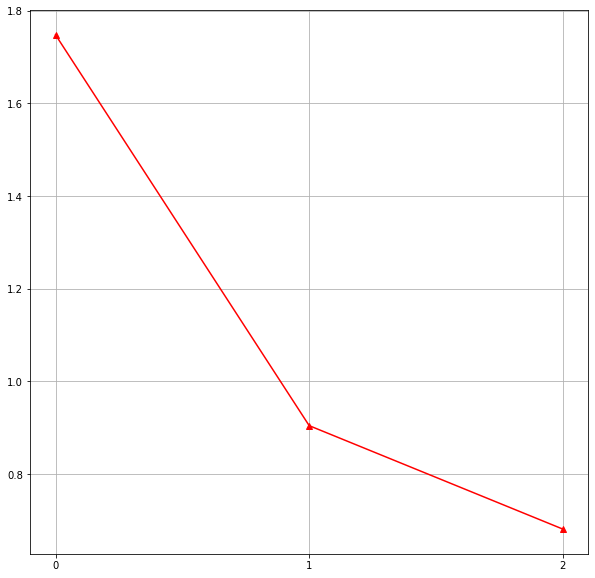

In [73]:
plt.figure(figsize=(10,10))
plt.xticks(range(len(pca_lamen.explained_variance_)))
plt.plot(pca_lamen.explained_variance_,marker = '^',c='red')
plt.grid()

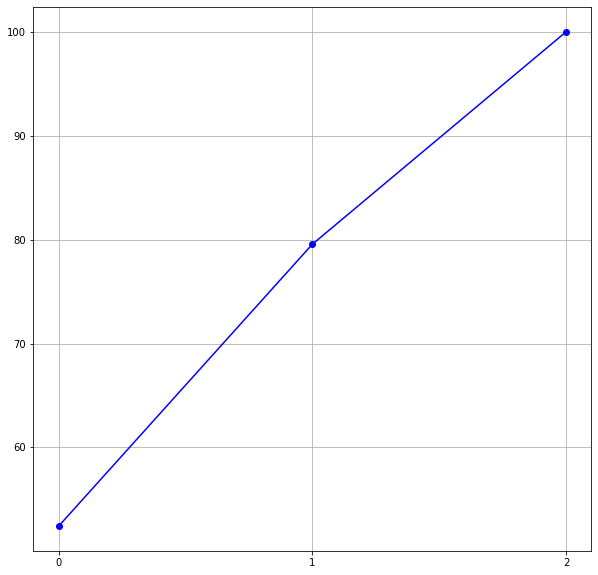

In [74]:
plt.figure(figsize=(10,10))
cumVar = np.cumsum(np.round(pca_lamen.explained_variance_ratio_,decimals=4)*100)
plt.xticks(range(len(pca_lamen.explained_variance_ratio_)))
plt.plot(cumVar,marker = 'o',c='b')
plt.grid()


In [97]:
pca_lamen.explained_variance_ratio_

array([0.52428462, 0.27133611, 0.20437927])

### [breast cancer data]

- PCA가 가장 널리 사용되는 분야 중 하나는 고차원 데이터 셋의 시각화
- 이 데이터와 같이 특성이 많은 데이터들은 시각화로 데이터의 특성을  
  살펴보는 것이 불가능
- iris 데이터에서 해보았듯이 산점도 행렬로 볼 수 있겠으나,
- 이 데이터에서는 30개의 특성에 대해 산점도 행렬을 그려도 특성을  
  보기는 어렵다
- 2차원에 표현해 볼 수 있는 한가지 방법은 두 클래스(악성, 양성)에 대해  
  각 특성별로 히스토그램을 그려보는 것

- #### cancer data 특성별 히스토그램

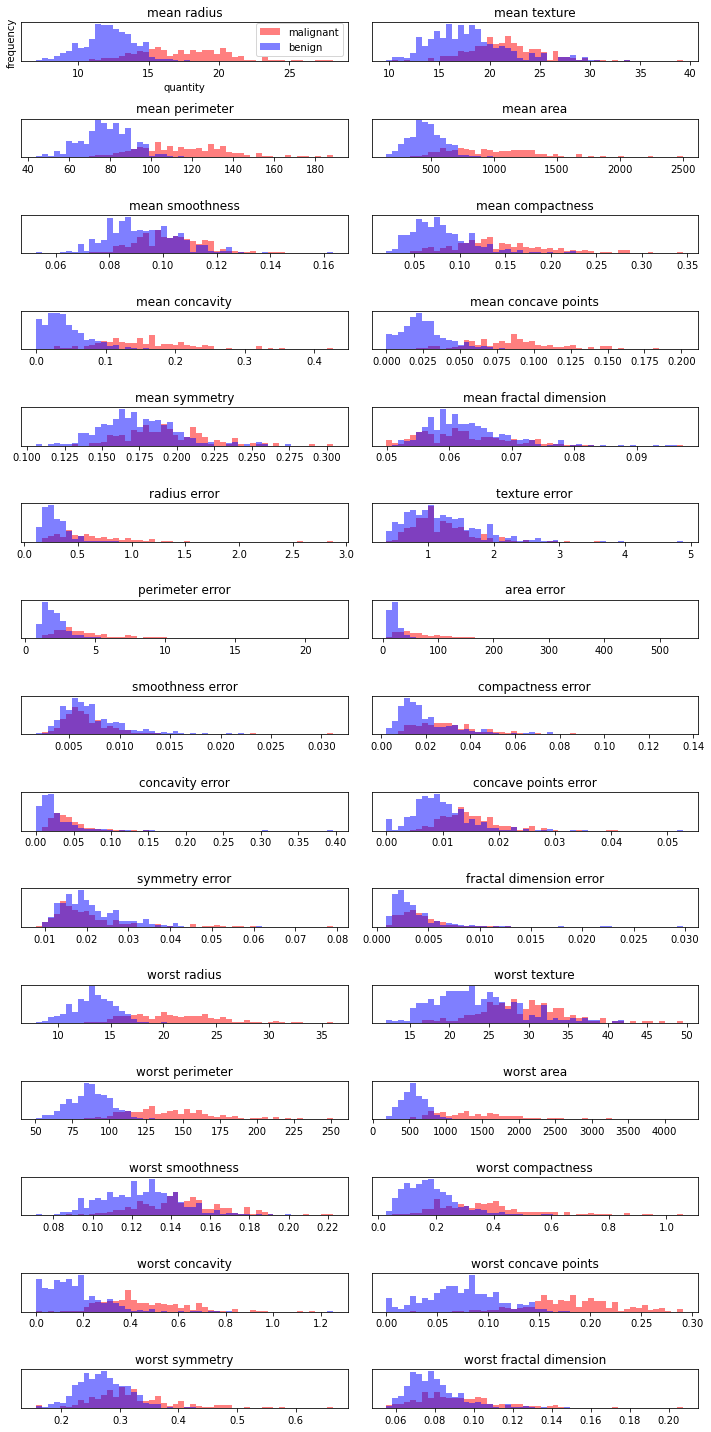

In [99]:
cancer = datasets.load_breast_cancer()

fig, axes = plt.subplots(15,2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color = 'red', alpha=0.5)
    ax[i].hist(benign[:,i], bins=bins, color = 'blue', alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("quantity")
ax[0].set_ylabel("frequency")
ax[0].legend(['malignant','benign'], loc="best")
fig.tight_layout()

- ### PCA 적용
  - StandardScaler를 사용해 각 특성의 분산이 1이 되도록 정규화

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [101]:
# load data
cancer = datasets.load_breast_cancer()

# scaling using StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# PCA modelling
pca_cancer = PCA()
pca_cancer.fit(X_scaled)

# data trasformation
X_pca_cancer = pca_cancer.transform(X_scaled)

# look into data shape
print("original data: {}".format(str(X_scaled.shape)))
print("deducted data: {}".format(str(X_pca_cancer.shape)))

original data: (569, 30)
deducted data: (569, 30)


In [102]:
var1 = np.cumsum(np.round(pca_cancer.explained_variance_ratio_, decimals=4)*100)

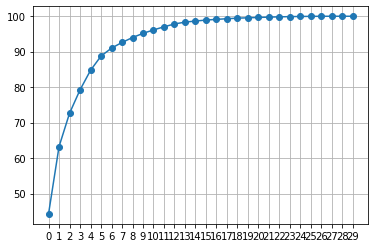

In [103]:
plt.xticks(range(len(pca_cancer.explained_variance_)))

plt.plot(var1, marker='o')
plt.grid()

No handles with labels found to put in legend.


Text(0, 0.5, 'PC2')

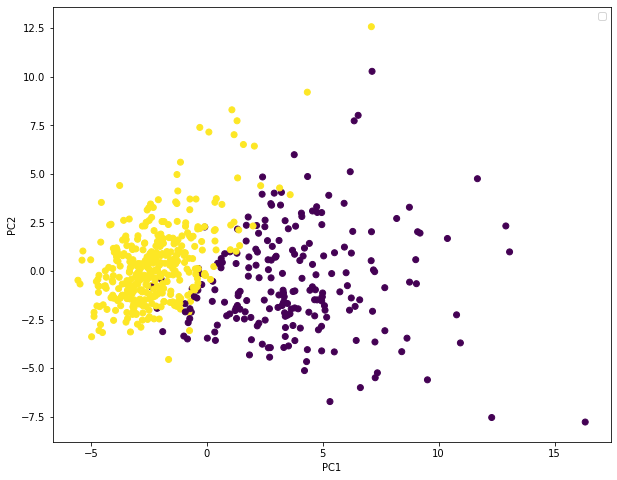

In [104]:
# 클래스 구분하여 처음 2개의 주성분에 나타냄

plt.figure(figsize = (10,8))
plt.scatter(X_pca_cancer[:,0], X_pca_cancer[:,1], c = cancer.target)
plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')

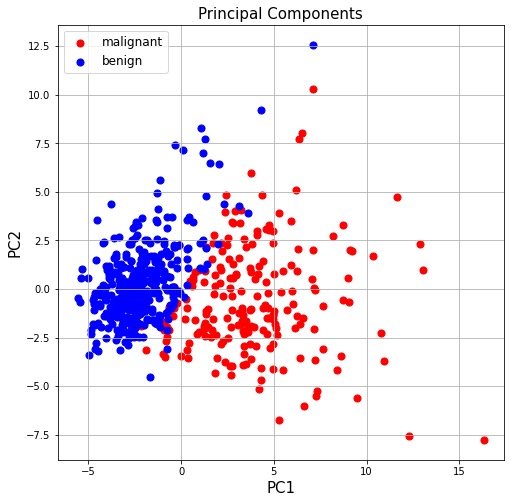

In [105]:
fig, axes = plt.subplots(1,1,figsize=(8,8))

targets = [0,1]
colors = ['r','b']

for target, color in zip(targets, colors):
    indicesToKeep = cancer.target == target
    axes.scatter(X_pca_cancer[indicesToKeep,0],X_pca_cancer[indicesToKeep,1],
                 c = color, s = 50)

axes.set_xlabel('PC1', size = 15)
axes.set_ylabel('PC2', size = 15)
axes.set_title("Principal Components", size = 15 )
axes.legend(['malignant','benign'], fontsize = 12, loc=2)
axes.grid()


## scree plot

In [106]:
pca_cancer.explained_variance_

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

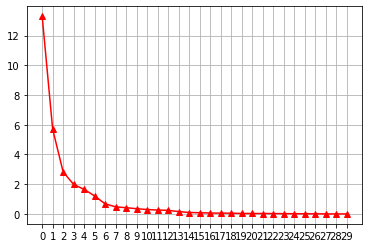

In [107]:
plt.xticks(range(len(pca_cancer.explained_variance_)))

plt.plot(pca_cancer.explained_variance_,marker='^',c='red')
plt.grid()

In [108]:
var1 = np.cumsum(np.round(pca_cancer.explained_variance_ratio_, decimals=4)*100)

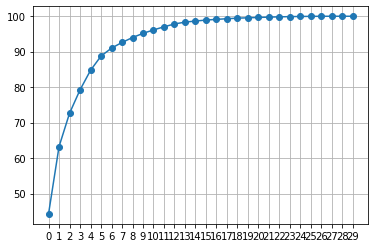

In [109]:
plt.xticks(range(len(pca_cancer.explained_variance_)))

plt.plot(var1, marker='o')
plt.grid()

### [7개 주성분 선택]

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [111]:
# load data
cancer = datasets.load_breast_cancer()

# scaling using StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# PCA modelling
pca_cancer7 = PCA(n_components=7)
pca_cancer7.fit(X_scaled)

# data trasformation
X_pca_cancer7 = pca_cancer7.transform(X_scaled)

# look into data shape
print("original data: {}".format(str(X_scaled.shape)))
print("deducted data: {}".format(str(X_pca_cancer7.shape)))

original data: (569, 30)
deducted data: (569, 7)


1. 로지스틱 리그레션

< PCA 전 >

In [112]:
# 1. 데이터 불러오기

cancer = datasets.load_breast_cancer()

# 2. 데이터 분할 - 이항분류

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# 3. modelling

logreg = LogisticRegression().fit(X_train, y_train)
logreg

# 4. 결과 비교

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

# 5. parameter tuning

logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)
logreg001

logreg1000 = LogisticRegression(C = 100).fit(X_train, y_train)
logreg1000

훈련 세트 점수: 0.945
테스트 세트 점수: 0.930


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegression(C=100)

< PCA 후 >

In [113]:
X_train_pca, X_test_pca, y_train, y_test =\
train_test_split(X_pca_cancer7, y, test_size = 0.2, random_state = 10)

In [114]:
# 3. modelling

logreg_pca = LogisticRegression().fit(X_train_pca, y_train)
logreg_pca

# 4. 결과 비교

print("훈련 세트 점수: {:.3f}".format(logreg_pca.score(X_train_pca, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg_pca.score(X_test_pca, y_test)))

훈련 세트 점수: 0.976
테스트 세트 점수: 0.965


<PCA전>  
훈련 세트 점수: 0.945  
테스트 세트 점수: 0.930


<PCA후>  
훈련 세트 점수: 0.976  
테스트 세트 점수: 0.965

### [Note]

- 위와 같이 주성분 분석을 모델의 성능 향상에 사용할 수 있다.
- 데이터를 대부분 설명하는 -일반적으로 80% 이상- 주성분을 추출해내면,  
  결론적으로 모델의 훈련시 feature의 수가 줄어드는 효과

- <u>**하지만**</u>, **7개의 주성분이 무엇을 의미하는지 정확하게 설명하기 어려운 단점이 있다.**

---

In [79]:
?np.linalg.eig

Signature: np.linalg.eig(a)
Docstring:
Compute the eigenvalues and right eigenvectors of a square array.

Parameters
----------
a : (..., M, M) array
    Matrices for which the eigenvalues and right eigenvectors will
    be computed

Returns
-------
w : (..., M) array
    The eigenvalues, each repeated according to its multiplicity.
    The eigenvalues are not necessarily ordered. The resulting
    array will be of complex type, unless the imaginary part is
    zero in which case it will be cast to a real type. When `a`
    is real the resulting eigenvalues will be real (0 imaginary
    part) or occur in conjugate pairs

v : (..., M, M) array
    The normalized (unit "length") eigenvectors, such that the
    column ``v[:,i]`` is the eigenvector corresponding to the
    eigenvalue ``w[i]``.

Raises
------
LinAlgError
    If the eigenvalue computation does not converge.

See Also
--------
eigvals : eigenvalues of a non-symmetric array.
eigh : eigenvalues and eigenvectors of a real symmet

In [80]:
?np.cov

Signature:
np.cov(
    m,
    y=None,
    rowvar=True,
    bias=False,
    ddof=None,
    fweights=None,
    aweights=None,
    *,
    dtype=None,
)
Docstring:
Estimate a covariance matrix, given data and weights.

Covariance indicates the level to which two variables vary together.
If we examine N-dimensional samples, :math:`X = [x_1, x_2, ... x_N]^T`,
then the covariance matrix element :math:`C_{ij}` is the covariance of
:math:`x_i` and :math:`x_j`. The element :math:`C_{ii}` is the variance
of :math:`x_i`.

See the notes for an outline of the algorithm.

Parameters
----------
m : array_like
    A 1-D or 2-D array containing multiple variables and observations.
    Each row of `m` represents a variable, and each column a single
    observation of all those variables. Also see `rowvar` below.
y : array_like, optional
    An additional set of variables and observations. `y` has the same form
    as that of `m`.
rowvar : bool, optional
    If `rowvar` is True (default), then each row re

In [81]:
? pd.DataFrame.cov

Signature:
 pd.DataFrame.cov(
    self,
    min_periods: 'Optional[int]' = None,
    ddof: 'Optional[int]' = 1,
) -> 'DataFrame'
Docstring:
Compute pairwise covariance of columns, excluding NA/null values.

Compute the pairwise covariance among the series of a DataFrame.
The returned data frame is the `covariance matrix
<https://en.wikipedia.org/wiki/Covariance_matrix>`__ of the columns
of the DataFrame.

Both NA and null values are automatically excluded from the
calculation. (See the note below about bias from missing values.)
A threshold can be set for the minimum number of
observations for each value created. Comparisons with observations
below this threshold will be returned as ``NaN``.

This method is generally used for the analysis of time series data to
understand the relationship between different measures
across time.

Parameters
----------
min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result.

ddof : int, defa